<a href="https://colab.research.google.com/github/Pickase/Fifa-2020/blob/main/Fifa20_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Csv/players_20.csv')

In [ ]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [ ]:
missing_value=df.isnull().sum().sort_values(ascending=False)
print(missing_value.to_string())

loaned_from                   17230
nation_position               17152
nation_jersey_number          17152
player_tags                   16779
gk_speed                      16242
gk_diving                     16242
gk_handling                   16242
gk_reflexes                   16242
gk_kicking                    16242
gk_positioning                16242
player_traits                 10712
lf                             2036
lw                             2036
rs                             2036
physic                         2036
defending                      2036
dribbling                      2036
passing                        2036
shooting                       2036
st                             2036
ls                             2036
rb                             2036
pace                           2036
rdm                            2036
rwb                            2036
ldm                            2036
lwb                            2036
rm                          

In [ ]:
#CLeaning the data for model
feature_drop=['overall','international_reputation','sofifa_id','player_url','short_name','nationality', 'club','player_tags','long_name','dob','player_positions',
                     'team_jersey_number','nation_jersey_number','nation_position','loaned_from',
                     'release_clause_eur','player_traits','body_type','real_face','joined', 'contract_valid_until',
                     'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']
data=df.drop(feature_drop,axis=1)                   

In [ ]:
data['team_position']=data['team_position'].fillna(data['team_position'].mode()[0])

In [ ]:
# Imputing skill column with MEAN of the respective columns
data.loc[data['pace'].isnull(),'pace']=data['pace'].mean()
data.loc[data['physic'].isnull(),'physic']=data['physic'].mean()
data.loc[data['shooting'].isnull(),'shooting']=data['shooting'].mean()
data.loc[data['passing'].isnull(),'passing']=data['passing'].mean()
data.loc[data['dribbling'].isnull(),'dribbling']=data['dribbling'].mean()
data.loc[data['defending'].isnull(),'defending']=data['defending'].mean()

In [ ]:
columns=['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb',
           'ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
for col in columns:
  data[col]=data[col].str.split('+',n=1,expand=True)[0]
data[columns]=data[columns].fillna(0)  
data[columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,31,33,33,33,33,33,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,33,35,36,36,36,35,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,44,45,46,46,46,45,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,46,46,46,46,46,46,48,48,48,48,48,48,49,49,49,48


In [ ]:
data[columns]=data[columns].astype(int)

In [ ]:
#Label Encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['preferred_foot']=lb.fit_transform(data['preferred_foot'])
data['team_position']=lb.fit_transform(data['team_position'])

In [ ]:
data[['attack_work_rate','defence_work_rate']]=data.work_rate.str.split('/',expand=True)

In [ ]:
data['attack_work_rate'] = data['attack_work_rate'].map({'Low':0, 'Medium':0.5,'High':1})
data['defence_work_rate'] = data['defence_work_rate'].map({'Low':0, 'Medium':0.5,'High':1})
data.drop('work_rate',axis=1,inplace=True)

In [ ]:

cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


# List of all columns that shows correlation greater than 0.95

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['defending_sliding_tackle', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']


In [ ]:
data.drop(['defending_sliding_tackle', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],axis=1,inplace=True)

<Axes: >

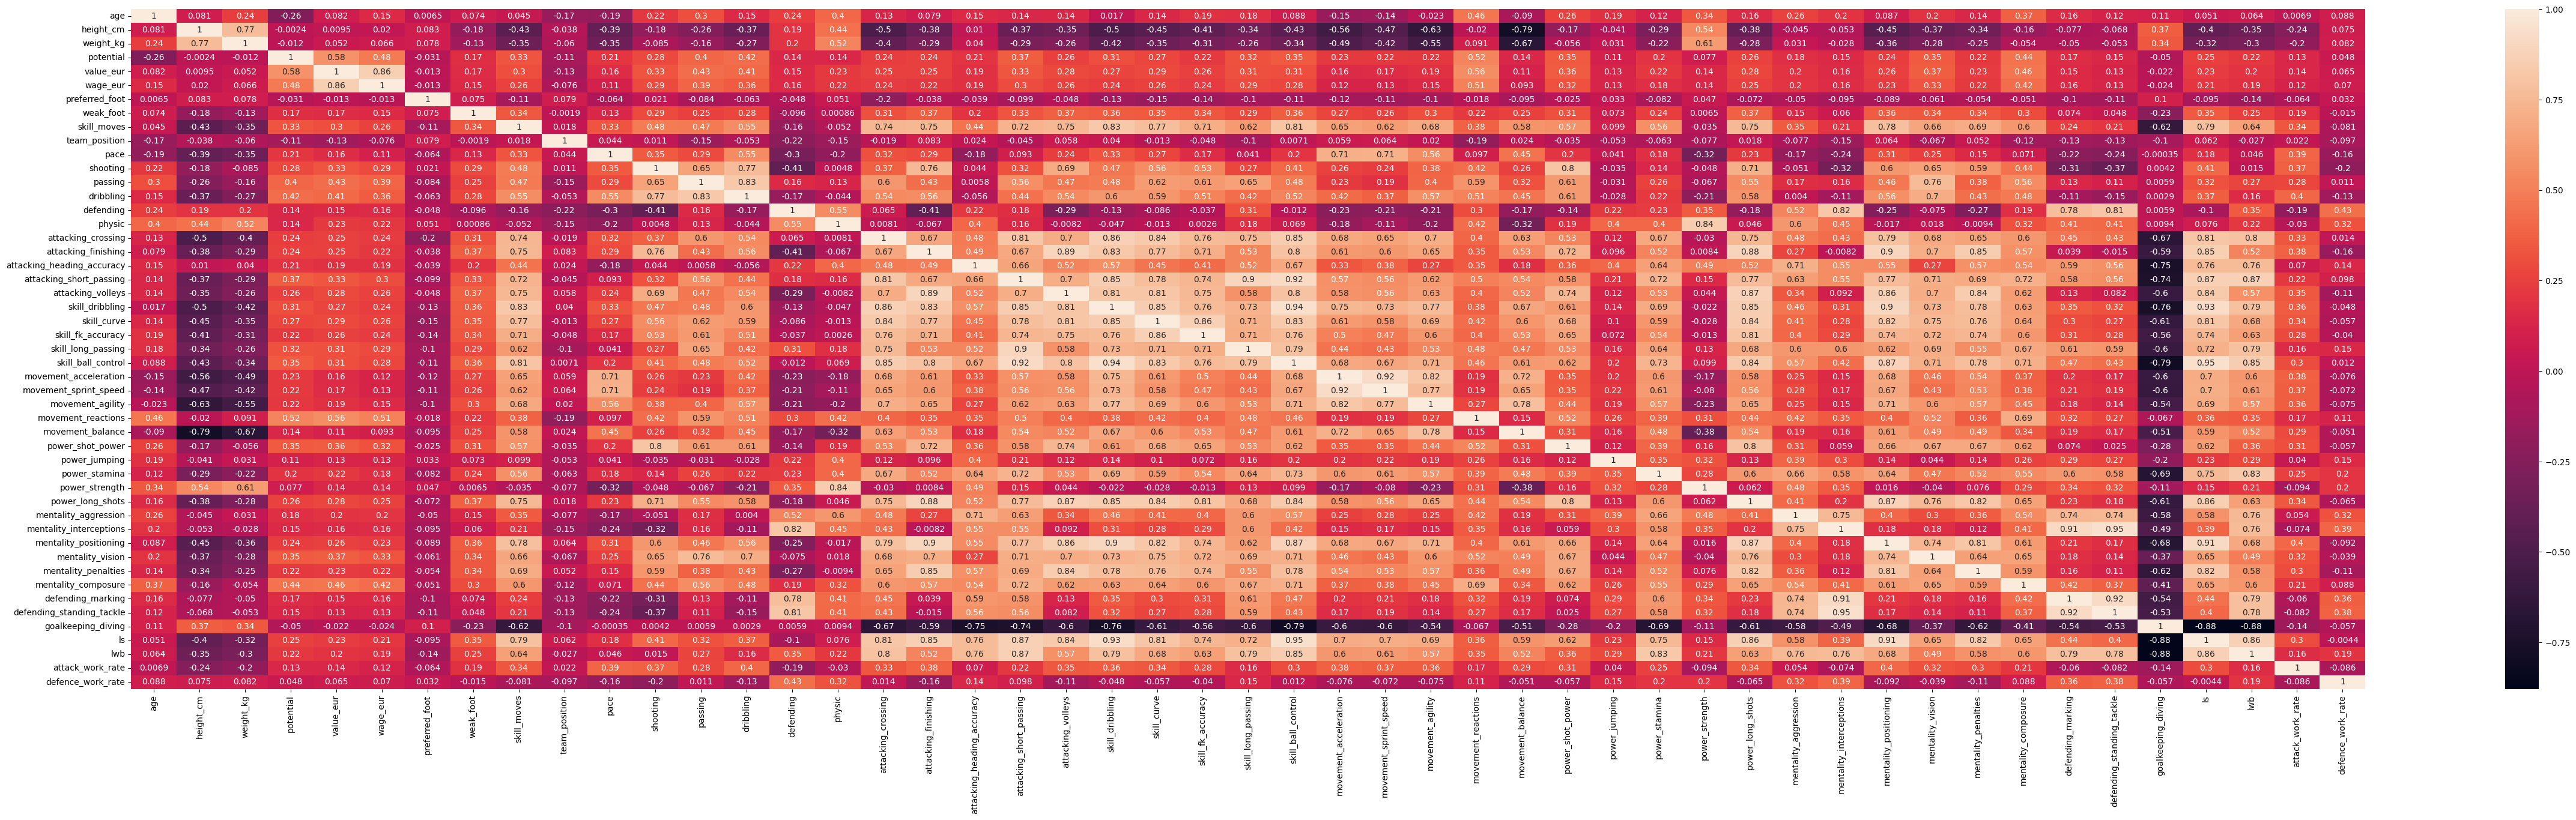

In [ ]:
plt.figure(figsize=(60,15),dpi=100)
sns.heatmap(data.corr(),annot=True)

In [ ]:
#scaling of the data

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [ ]:
scaler=preprocessing.RobustScaler()
data_scaled=scaler.fit_transform(data)
final_data=pd.DataFrame(data_scaled)

In [ ]:
data.head()

,age,height_cm,weight_kg,potential,value_eur,wage_eur,preferred_foot,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,goalkeeping_diving,ls,lwb,attack_work_rate,defence_work_rate
0,32,170,72,94,95500000,565000,0,4,4,25,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,6,89,68,0.5,0.0
1,34,187,83,93,58500000,405000,1,4,5,14,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,7,91,65,1.0,0.0
2,27,175,68,92,105500000,290000,1,5,5,0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,9,84,66,1.0,0.5
3,26,188,87,93,77500000,125000,1,3,1,5,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,87,0,0,0.5,0.5
4,28,175,74,91,90000000,470000,1,4,4,14,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,11,83,66,1.0,0.5


In [ ]:
final_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,1.000000,-1.222222,-0.3,2.875,53.408451,80.285714,-1.0,1.0,2.0,0.181818,1.754464,2.205650,3.160566,3.042583,-0.52000,0.102120,1.307692,1.43750,0.70,2.142857,1.692308,2.000000,1.571429,2.12,1.714286,2.200000,1.263158,0.944444,1.421053,2.750000,1.611111,1.35,0.133333,0.500000,0.1250,1.433333,-0.40,-0.307692,1.56,1.95,1.238095,2.2500,-0.542857,-0.461538,-0.833333,2.0000,0.800000,0.0,-0.5
1,1.285714,0.666667,0.8,2.750,32.563380,57.428571,0.0,1.0,3.0,-0.818182,2.027191,2.261206,2.251475,2.406220,-0.68000,1.193029,1.153846,1.40625,1.65,1.500000,1.653846,1.555556,1.142857,1.40,1.000000,1.933333,1.157895,1.333333,1.105263,2.833333,0.277778,1.80,1.933333,1.055556,0.7500,1.400000,0.20,-0.589744,1.60,1.35,1.714286,2.1875,-0.685714,-0.589744,-0.666667,2.1250,0.600000,1.0,-0.5
2,0.285714,-0.666667,-0.7,2.625,59.042254,41.000000,0.0,2.0,3.0,-2.090909,2.118100,1.816761,2.706020,2.951674,-0.80000,-0.625153,1.269231,1.18750,0.30,1.785714,1.653846,1.944444,1.392857,1.84,1.190476,2.133333,1.421053,1.222222,1.578947,2.500000,1.000000,1.05,-0.333333,0.833333,-1.0625,1.100000,-0.28,-0.410256,1.28,1.75,1.952381,2.1250,-0.714286,-0.743590,-0.333333,1.6875,0.666667,1.0,0.0
3,0.142857,0.777778,1.2,2.750,43.267606,17.428571,0.0,0.0,-1.0,-1.636364,0.000000,0.000000,0.000000,0.000000,-0.01786,0.000000,-1.576923,-1.18750,-2.05,-1.357143,-1.192308,-2.722222,-1.285714,-1.08,-0.761905,-2.200000,-1.263158,-0.388889,0.052632,2.166667,-0.944444,0.00,0.800000,-1.388889,0.7500,-1.300000,-0.96,-0.846154,-1.76,0.50,-1.809524,0.5000,-0.714286,-1.102564,12.666667,-3.5625,-3.733333,0.0,0.0
4,0.428571,-0.666667,-0.1,2.500,50.309859,66.714286,0.0,1.0,2.0,-0.818182,2.118100,1.705650,2.615111,2.860765,-0.68000,0.102120,1.038462,1.09375,0.25,1.928571,1.500000,1.888889,1.214286,1.52,1.285714,2.066667,1.421053,1.166667,1.526316,2.333333,1.555556,1.15,-0.666667,1.000000,-0.1875,0.966667,-0.16,-0.282051,1.28,1.70,1.857143,1.9375,-0.514286,-0.717949,0.000000,1.6250,0.666667,1.0,0.0


In [ ]:
#Dimentonality Reduction using Principal Componrnt analysis

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

In [ ]:
data_pca=pca.fit_transform(final_data)

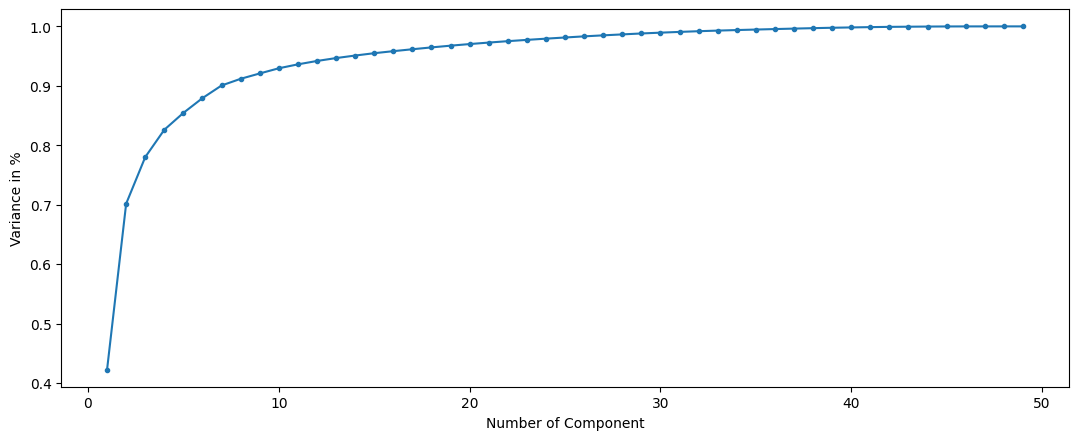

In [ ]:
explained_variance=pca.explained_variance_ratio_
plt.figure(figsize=(13,5),dpi=100)
plt.plot(range(1,50),pca.explained_variance_ratio_.cumsum(),marker='.')
plt.xlabel('Number of Component')
plt.ylabel('Variance in %')
plt.show()

In [ ]:
pca=PCA(n_components=3,random_state=42)
pca_data=pca.fit_transform(final_data)
df_pca=pd.DataFrame(pca_data)

In [ ]:
df_pca.head()

,0,1,2
0,65.821373,62.963483,8.214552
1,45.823555,41.293929,5.548369
2,50.771196,46.588193,2.221256
3,18.351616,39.642235,1.801655
4,57.525352,55.255714,6.116808


In [ ]:
#Model Building

In [ ]:
#1.Kmeans
from sklearn.cluster import KMeans
WCSS=[]
for k in range(2,11):
  km=KMeans(n_clusters=k,random_state=5)
  km.fit(data_pca)
  WCSS.append(km.inertia_)
WCSS

[699576.246237162,
 505632.15641903505,
 413587.8728139546,
 356876.69253000244,
 329029.3538925505,
 304266.42859534756,
 290391.31633564644,
 280232.84866888175,
 270672.7484273033]

Text(0, 0.5, 'WCSS')

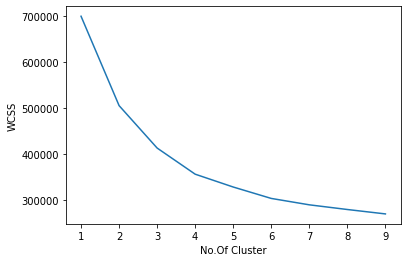

In [ ]:
plt.plot(list(range(1,10)),WCSS)
plt.xlabel('No.Of Cluster')
plt.ylabel('WCSS')         

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [ ]:
range_n=range(2,10)
silhouette_scr=[]
for num_c in range_n:
  kmeans=KMeans(n_clusters=num_c)
  kmeans.fit_transform(df_pca)
  cluster_labels=kmeans.labels_
  silhouette_scr.append(silhouette_score(df_pca,cluster_labels))

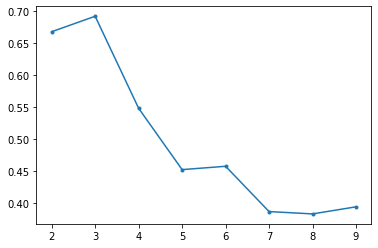

In [ ]:
silhouette_scr
plt.plot(range_n,silhouette_scr,marker='.')

In [ ]:
model_k=KMeans(n_clusters=2,random_state=1)

In [ ]:
model_k.fit(pca_data)

KMeans(n_clusters=2, random_state=1)

In [ ]:
label=model_k.labels_
label
silhouette_score(pca_data,label)

0.667833123944677

In [ ]:
kmeans_pca=KMeans(n_clusters=2,random_state=42).fit(df_pca)
kmeans_pca_c=pd.DataFrame(df_pca.copy())
kmeans_pca_c.loc[:,'Cluster']=kmeans_pca.labels_
kmeans_pca_c.shape

(18278, 4)

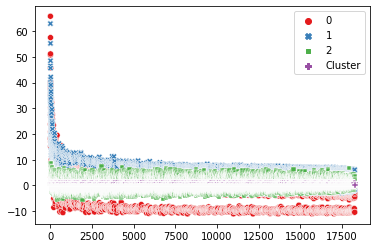

In [ ]:
plt.figsize=(30,10)
sns.scatterplot(data=kmeans_pca_c, palette='Set1', legend='full')
plt.show()

In [ ]:
KM_clust_sizes=kmeans_pca_c.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns=['KM_size']
KM_clust_sizes

,KM_size
Cluster,
0,16242
1,2036


In [ ]:
data_c=pd.concat([data,kmeans_pca_c[['Cluster']]],axis=1)
data_c.head()

,age,height_cm,weight_kg,potential,value_eur,wage_eur,preferred_foot,weak_foot,skill_moves,team_position,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,goalkeeping_diving,ls,lwb,attack_work_rate,defence_work_rate,Cluster
0,32,170,72,94,95500000,565000,0,4,4,25,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,6,89,68,0.5,0.0,0
1,34,187,83,93,58500000,405000,1,4,5,14,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,7,91,65,1.0,0.0,0
2,27,175,68,92,105500000,290000,1,5,5,0,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,9,84,66,1.0,0.5,0
3,26,188,87,93,77500000,125000,1,3,1,5,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,87,0,0,0.5,0.5,1
4,28,175,74,91,90000000,470000,1,4,4,14,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,11,83,66,1.0,0.5,0


In [ ]:
data_1_Cluster = data_c[data_c["Cluster"] == 1]
data_0_Cluster = data_c[data_c["Cluster"] == 0]